In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [125]:
iris= pd.read_csv('iris.csv')

In [67]:
iris.shape

(150, 5)

In [68]:
iris.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

In [24]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [25]:
iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slicing data set for Independent variables and dependent variables

In [26]:
x= iris.drop('Class', axis=1)
y=iris.pop('Class')


In [28]:
#Check the dataset
print(y)
print(x)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

### Distribution of target variable (Class)

In [140]:
#iris= pd.DataFrame(iris)
#iris1=iris.reset_index()
iris.iloc[:,4].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Class, dtype: object

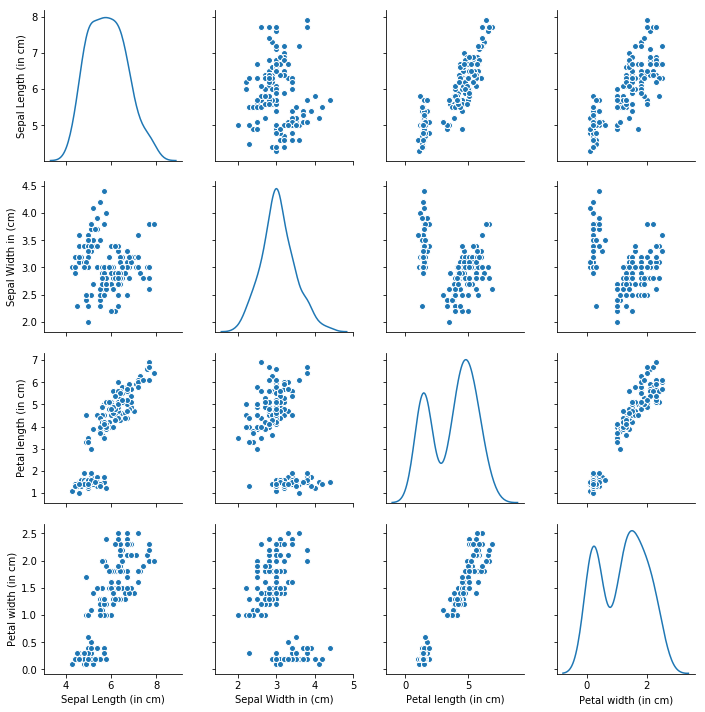

In [69]:
import seaborn as sns
sns.pairplot(iris , diag_kind = "kde")

### Ploting the distribution of target variable using histogram

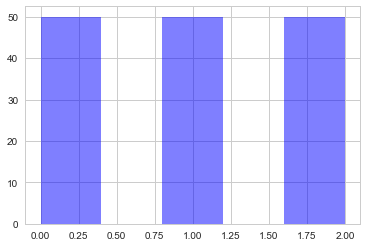

In [141]:
num_bins = 5
n, bins, patches = plt.hist(y, num_bins, facecolor='blue', alpha=0.5)
plt.show()

### Plotinging Scatter Matrix to understand the distribution of variables

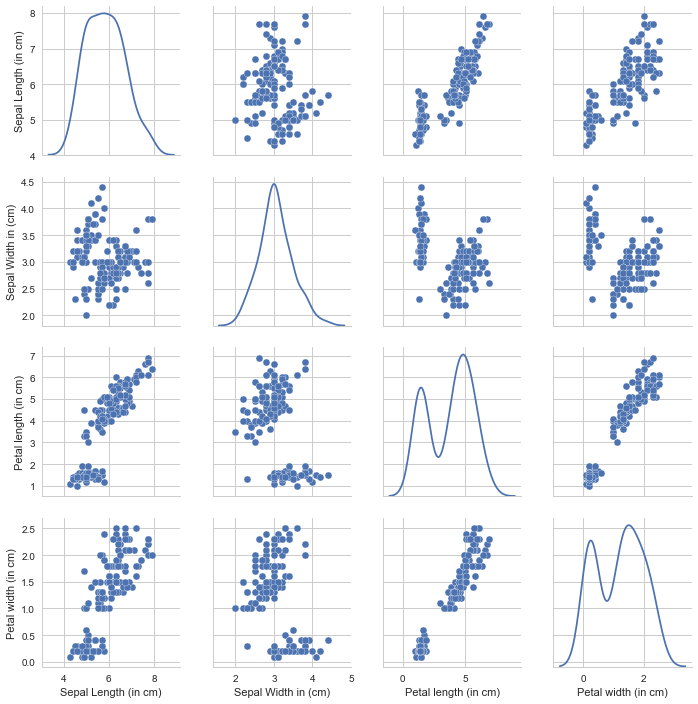

In [142]:
import seaborn as sns
sns.pairplot(iris , diag_kind = "kde")

#Insights- The distribution says sepal length and sepal width is almost a perfect normal curve and is not helpful 
#in deterninng the class

### Summary Statistics

In [74]:
iris.describe()

#Insights- Sepal Length: mean is 5.84 and standard Deviation is 0.83
#Insights2: Petal Length: mean is 3.75 and standard Deviation is 1.76

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.drop('ID')

In [79]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
iris['Class']= le.fit_transform(iris['Class'])

In [84]:
iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Checking Correlation among all variables 

In [85]:
iris.corr()

#Insights- Sepal Lenght is highly correlated with Petal Length and Petal WIdth but as per instruction, I am not removing it
#before modelling

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


### Split data in Training and Validation in 80:20 (1 Marks)

In [ ]:
### SPLITTING INTO TRAINING AND TEST SETS

In [87]:
from sklearn.model_selection import train_test_split

X =  iris.drop("Class", axis=1)


In [89]:
y =  iris.pop("Class")

In [90]:
X.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [101]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

###  Feature Scaling

In [ ]:
# Use StandardScaler or similar methods

In [102]:
from sklearn.preprocessing import StandardScaler

In [106]:
X = StandardScaler().fit_transform(X)

In [108]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

### Training and Fitting NaiveBayes Model

In [ ]:
#Fit the model

In [110]:
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB(priors=None)

In [ ]:
#Predict

In [112]:
from sklearn import metrics

In [114]:
test_pred = model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.94      0.89      0.91        18
          2       0.86      0.92      0.89        13

avg / total       0.94      0.93      0.93        45



In [115]:
print(metrics.confusion_matrix(test_labels, test_pred))

[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]


In [116]:
model.score(train_set , train_labels)

0.9523809523809523

### Accuracy and Confusion Matrix 

In [1]:

print(metrics.confusion_matrix(test_labels, test_pred))



NameError: name 'metrics' is not defined

In [119]:
# show accuracy
model.score(train_set , train_labels)

0.9523809523809523

In [118]:
#Show precision and Recall metrics
print(metrics.classification_report(test_labels, test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.94      0.89      0.91        18
          2       0.86      0.92      0.89        13

avg / total       0.94      0.93      0.93        45



In [ ]:
#Model has predicted 3 labels incorrectly
#f1-score is overall good